In [ ]:
pip install opencv-python

Dimensions of first Cardinal (Color): (3840, 2160, 3)
Dimensions of second Cardinal (color): (3840, 2160, 3)
Dimensions of first Sparrow (Color): (1920, 1080, 3)


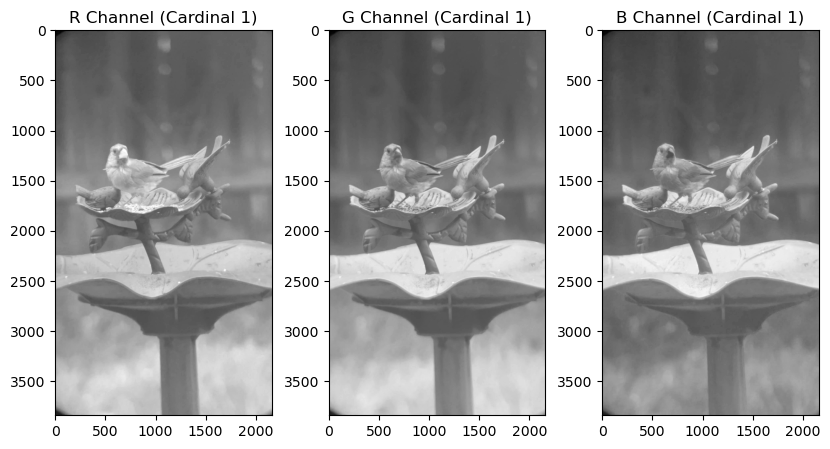

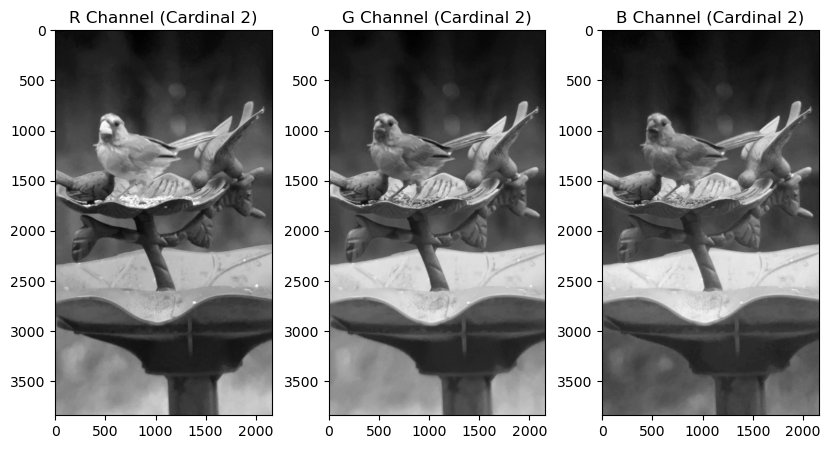

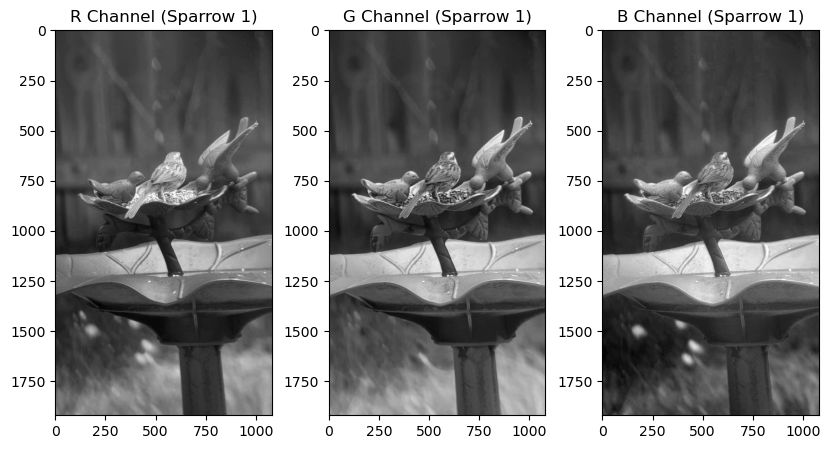

Dimensions of Cardinal 1 (Grayscale): (3840, 2160)
Dimensions of Cardinal 2 (Grayscale): (3840, 2160)
Dimensions of Sparrow 2 (Grayscale): (1920, 1080)


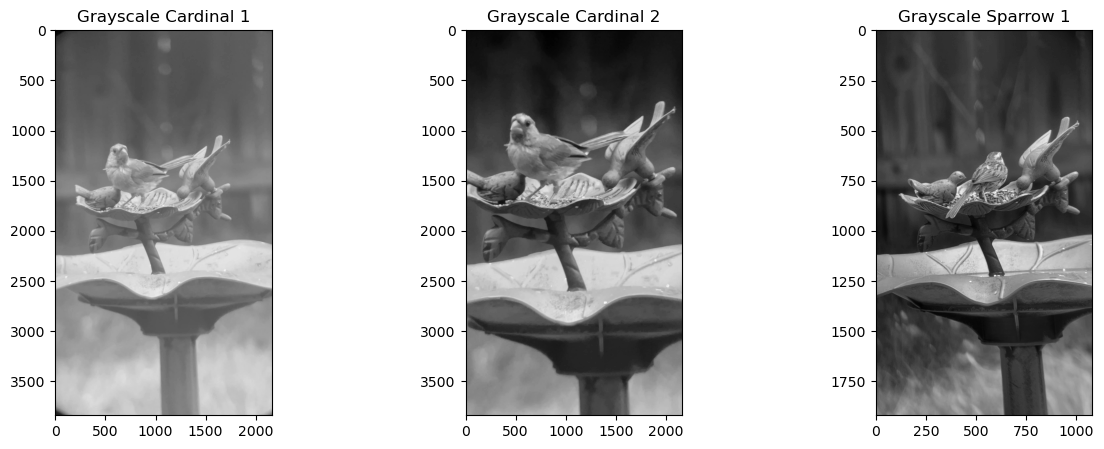

In [25]:
################################################################################################################################
###################################################### TASK 4 ##################################################################
################################################################################################################################

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

xx_color = cv2.imread(r"C:\Users\willh\OneDrive\Documents\CSC410ProjectPt1\data\birdsDataset-main\Cardinals_in_color\frame-08-02-202286.jpg")
yy_color = cv2.imread(r"C:\Users\willh\OneDrive\Documents\CSC410ProjectPt1\data\birdsDataset-main\Cardinals_in_color\frame-08-02-2022111.jpg")
zz_color = cv2.imread(r"C:\Users\willh\OneDrive\Documents\CSC410ProjectPt1\data\birdsDataset-main\Sparrows_in_color\frame433.jpg")
print("Dimensions of first Cardinal (Color):", xx_color.shape)
print("Dimensions of second Cardinal (color):", yy_color.shape)
print("Dimensions of first Sparrow (Color):", zz_color.shape)
xx_B, xx_G, xx_R = cv2.split(xx_color)
plt.figure(figsize=(10,5))
plt.subplot(1, 3, 1)
plt.title('R Channel (Cardinal 1)')
plt.imshow(xx_R, cmap='gray')
plt.subplot(1, 3, 2)
plt.title('G Channel (Cardinal 1)')
plt.imshow(xx_G, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('B Channel (Cardinal 1)')
plt.imshow(xx_B, cmap='gray')
plt.show()
yy_B, yy_G, yy_R = cv2.split(yy_color)
plt.figure(figsize=(10,5))
plt.subplot(1, 3, 1)
plt.title('R Channel (Cardinal 2)')
plt.imshow(yy_R, cmap='gray')
plt.subplot(1, 3, 2)
plt.title('G Channel (Cardinal 2)')
plt.imshow(yy_G, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('B Channel (Cardinal 2)')
plt.imshow(yy_B, cmap='gray')
plt.show()
zz_B, zz_G, zz_R = cv2.split(zz_color)
plt.figure(figsize=(10,5))
plt.subplot(1, 3, 1)
plt.title('R Channel (Sparrow 1)')
plt.imshow(zz_R, cmap='gray')
plt.subplot(1, 3, 2)
plt.title('G Channel (Sparrow 1)')
plt.imshow(zz_G, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('B Channel (Sparrow 1)')
plt.imshow(zz_B, cmap='gray')
plt.show()
xx_gray = cv2.cvtColor(xx_color, cv2.COLOR_BGR2GRAY)
yy_gray = cv2.cvtColor(yy_color, cv2.COLOR_BGR2GRAY)
zz_gray = cv2.cvtColor(zz_color, cv2.COLOR_BGR2GRAY)
print("Dimensions of Cardinal 1 (Grayscale):", xx_gray.shape)
print("Dimensions of Cardinal 2 (Grayscale):", yy_gray.shape)
print("Dimensions of Sparrow 2 (Grayscale):", zz_gray.shape)
plt.figure(figsize=(15,5))
# Display Grayscale Cardinal 1
plt.subplot(1, 3, 1)  
plt.title('Grayscale Cardinal 1')
plt.imshow(xx_gray, cmap='gray')
# Display Grayscale Cardinal 2
plt.subplot(1, 3, 2)  
plt.title('Grayscale Cardinal 2')
plt.imshow(yy_gray, cmap='gray')
# Display Grayscale Sparrow 1
plt.subplot(1, 3, 3)  
plt.title('Grayscale Sparrow 1')
plt.imshow(zz_gray, cmap='gray')
plt.show()

Resized Image Dimensions (HxW): 256x144
Resized Image Dimensions (HxW): 256x144


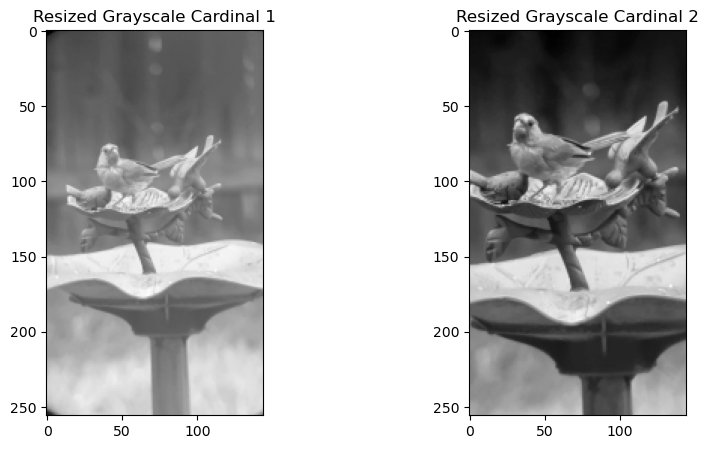

In [9]:
################################################################################################################################
###################################################### TASK 5 ##################################################################
################################################################################################################################

def resize_image_divisible_by_16(image, target_height=256):
    # Get the original dimensions of the image
    original_height, original_width = image.shape    
    # Compute the aspect ratio
    aspect_ratio = original_width / original_height
    # Calculate the new width using the aspect ratio, ensuring it is divisible by 16
    new_width = int(round(target_height * aspect_ratio))
    # Ensure the new width is divisible by 16
    new_width = (new_width // 16) * 16
    # Resize the image to the new dimensions
    resized_image = cv2.resize(image, (new_width, target_height), interpolation=cv2.INTER_AREA)
    # Print the new dimensions
    print(f"Resized Image Dimensions (HxW): {target_height}x{new_width}")
    return resized_image
# Load the grayscale images
xx_gray = cv2.cvtColor(cv2.imread(r"C:\Users\willh\OneDrive\Documents\CSC410ProjectPt1\data\birdsDataset-main\Cardinals_in_color\frame-08-02-202286.jpg"), cv2.COLOR_BGR2GRAY)
yy_gray = cv2.cvtColor(cv2.imread(r"C:\Users\willh\OneDrive\Documents\CSC410ProjectPt1\data\birdsDataset-main\Cardinals_in_color\frame-08-02-2022111.jpg"), cv2.COLOR_BGR2GRAY)
# Resize the images with a height of 256 and width divisible by 16
resized_xx_gray = resize_image_divisible_by_16(xx_gray, target_height=256)
resized_yy_gray = resize_image_divisible_by_16(yy_gray, target_height=256)
# Display resized images
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('Resized Grayscale Cardinal 1')
plt.imshow(resized_xx_gray, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Resized Grayscale Cardinal 2')
plt.imshow(resized_yy_gray, cmap='gray')
plt.show()

In [13]:
################################################################################################################################
###################################################### TASK 6 ##################################################################
################################################################################################################################

def image_to_block_vectors(image, label, block_size=16):
    vectors = []
    h, w = image.shape
    # Ensure image dimensions are divisible by 16
    if h % block_size != 0 or w % block_size != 0:
        print("Warning: Image dimensions are not divisible by 16. Trimming the image.")
        h = (h // block_size) * block_size
        w = (w // block_size) * block_size
        image = image[:h, :w]
    # Loop over the image to divide it into blocks of block_size x block_size
    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            # Extract a block of 16x16 pixels
            block = image[i:i+block_size, j:j+block_size]
            # Flatten the block to a vector of size 256 (16x16 = 256)
            vector = block.flatten()
            # Append the label to the vector (to create a labeled feature vector)
            vector = np.append(vector, label)
            # Store the vector
            vectors.append(vector)
    return vectors
# Load grayscale images
xx_gray = cv2.cvtColor(cv2.imread(r"C:\Users\willh\OneDrive\Documents\CSC410ProjectPt1\data\birdsDataset-main\Cardinals_in_color\frame-08-02-202286.jpg"), cv2.COLOR_BGR2GRAY)
yy_gray = cv2.cvtColor(cv2.imread(r"C:\Users\willh\OneDrive\Documents\CSC410ProjectPt1\data\birdsDataset-main\Cardinals_in_color\frame-08-02-2022111.jpg"), cv2.COLOR_BGR2GRAY)
# Convert each image into block vectors and label them accordingly (0, 1, 2)
vectors_image1 = image_to_block_vectors(xx_gray, label=0)
vectors_image2 = image_to_block_vectors(yy_gray, label=1)
# Combine all vectors into one list
all_vectors = vectors_image1 + vectors_image2
# Convert the list to a pandas DataFrame
df = pd.DataFrame(all_vectors)
# Save the DataFrame to a CSV file (each row is a vector of size 256 + label)
df.to_csv('image_feature_vectors.csv', index=False, header=False)
print("Feature vectors saved to 'image_feature_vectors.csv'.")

Feature vectors saved to 'image_feature_vectors.csv'.


In [14]:
################################################################################################################################
###################################################### TASK 7 ##################################################################
################################################################################################################################

def sliding_window(image, block_size=16, stride=8, label=0):
    vectors = []
    h, w = image.shape
    # Loop over the image with a sliding window
    for i in range(0, h - block_size + 1, stride):  # Ensure we don't go beyond the edge
        for j in range(0, w - block_size + 1, stride):
            # Extract the 16x16 block
            block = image[i:i + block_size, j:j + block_size]
            # Flatten the block to a vector of size 256 (16x16 = 256)
            vector = block.flatten()
            # Append the label to the vector
            vector = np.append(vector, label)
            # Store the vector
            vectors.append(vector)
    return vectors
# Load the grayscale images
xx_gray = cv2.cvtColor(cv2.imread(r"C:\Users\willh\OneDrive\Documents\CSC410ProjectPt1\data\birdsDataset-main\Cardinals_in_color\frame-08-02-202286.jpg"), cv2.COLOR_BGR2GRAY)
yy_gray = cv2.cvtColor(cv2.imread(r"C:\Users\willh\OneDrive\Documents\CSC410ProjectPt1\data\birdsDataset-main\Cardinals_in_color\frame-08-02-2022111.jpg"), cv2.COLOR_BGR2GRAY)
# Define parameters for sliding window
block_size = 16  # 16x16 blocks
stride = 8       # Sliding window stride (overlap by 8 pixels)
# Generate feature vectors for each image with labels 0, 1, and 2
vectors_image1 = sliding_window(xx_gray, block_size=block_size, stride=stride, label=0)
vectors_image2 = sliding_window(yy_gray, block_size=block_size, stride=stride, label=1)
# Combine all vectors into one list
all_vectors = vectors_image1 + vectors_image2
# Convert the list to a pandas DataFrame
df = pd.DataFrame(all_vectors)
# Save the DataFrame to a CSV file (each row is a vector of size 256 + label)
df.to_csv('sliding_window_feature_vectors.csv', index=False, header=False)
print("Sliding window feature vectors saved to 'sliding_window_feature_vectors.csv'.")

Sliding window feature vectors saved to 'sliding_window_feature_vectors.csv'.


Dataset Information:
Number of observations: 257702
Number of features (dimensions): 256
Mean of each feature (first 10): 
0    131.500116
1    131.476364
2    131.470784
3    131.482845
4    131.488917
5    131.480369
6    131.497920
7    131.508203
8    131.543123
9    131.519166
dtype: float64
Variance of each feature (first 10): 
0    2304.926374
1    2303.847806
2    2304.057538
3    2304.192415
4    2304.516047
5    2304.537406
6    2304.085744
7    2304.316786
8    2304.963591
9    2303.878467
dtype: float64
Class distribution:
256
0    128851
1    128851
Name: count, dtype: int64


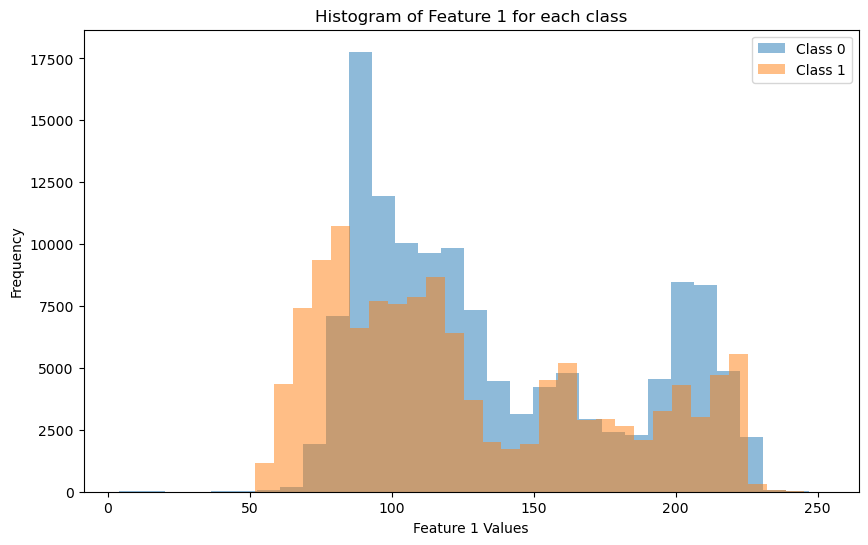

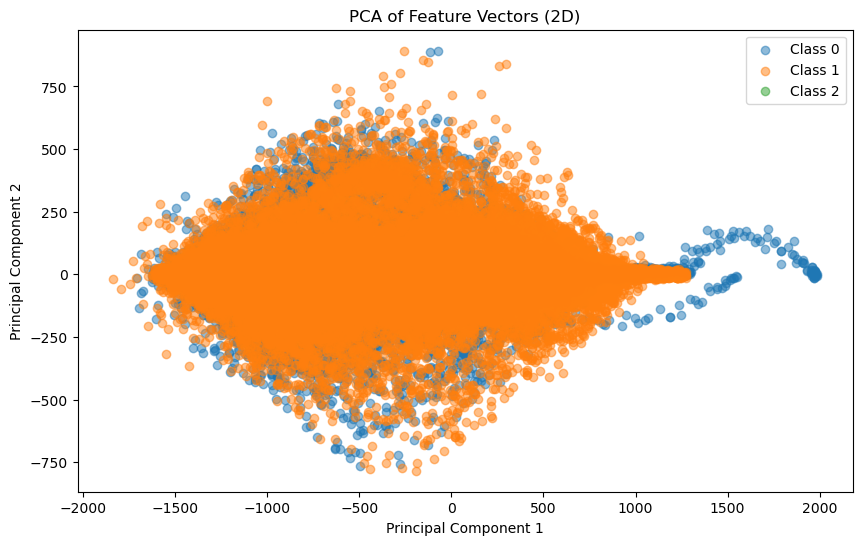

Standardization: Mean and variance after scaling
Mean of first 10 features (after scaling): 
[-1.04112866e-16  2.62929101e-16  2.06461106e-16 -2.47047478e-16
 -1.19994489e-16 -1.16465240e-16 -3.70571217e-17 -3.51160343e-16
  1.55286986e-16 -1.18229864e-16]
Variance of first 10 features (after scaling): 
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Normalization: Range of values after scaling
Min of first 10 features (after normalization): 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Max of first 10 features (after normalization): 
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [16]:
################################################################################################################################
###################################################### TASK 8 ##################################################################
################################################################################################################################

df = pd.read_csv('sliding_window_feature_vectors.csv', header=None)
# Split data and labels
X = df.iloc[:, :-1]  # Features (pixel values)
y = df.iloc[:, -1]   # Labels (0, 1, or 2)
# Statistical Information
print("Dataset Information:")
print(f"Number of observations: {X.shape[0]}")
print(f"Number of features (dimensions): {X.shape[1]}")
# Mean and variance of each feature (pixel)
means = X.mean(axis=0)
variances = X.var(axis=0)
print(f"Mean of each feature (first 10): \n{means[:10]}")
print(f"Variance of each feature (first 10): \n{variances[:10]}")
# Check class distribution (imbalance check)
class_counts = y.value_counts()
print(f"Class distribution:\n{class_counts}")
# Visual Representation
# Plot histogram of the first feature across different classes
plt.figure(figsize=(10, 6))
for label in np.unique(y):
    plt.hist(X[y == label].iloc[:, 0], bins=30, alpha=0.5, label=f'Class {label}')
plt.title('Histogram of Feature 1 for each class')
plt.xlabel('Feature 1 Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()
# PCA for dimensionality reduction and visualization (2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], label='Class 0', alpha=0.5)
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], label='Class 1', alpha=0.5)
plt.scatter(X_pca[y == 2, 0], X_pca[y == 2, 1], label='Class 2', alpha=0.5)
plt.title('PCA of Feature Vectors (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
# Standardization
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
print("Standardization: Mean and variance after scaling")
print(f"Mean of first 10 features (after scaling): \n{X_standardized.mean(axis=0)[:10]}")
print(f"Variance of first 10 features (after scaling): \n{X_standardized.var(axis=0)[:10]}")
# Normalization
normalizer = MinMaxScaler()
X_normalized = normalizer.fit_transform(X)
print("Normalization: Range of values after scaling")
print(f"Min of first 10 features (after normalization): \n{X_normalized.min(axis=0)[:10]}")
print(f"Max of first 10 features (after normalization): \n{X_normalized.max(axis=0)[:10]}")

Is the dataset imbalanced, inaccurate, or incomplete? Is it a trivial data or
possibly a big data? Does it have scalability problem? Are they high dimensional? Do you need to standardize?
Do you need to normalize? How do they affect the data characteristics?

The data being analyzed appears relatively balanced, as indicated by the highly overlapping frequency values for class 0 and class 1 depicted by the histogram, as well as each class having an equal number of features and observations. The data does not appear to be inaccurate as there are no outlying clusters of datapoints where they should not be expected to be found when we look at the PCA generated for the feature vectors. As there are 257702 within the data, I would describe this data as possibly big data. Because the features exhibit high correlation, there may be an issue of inefficient feature space usage, which may affect scalability. The dataset is likely not high dimensional as it includes a small number of features (256) relative to its large number of observations (257,702). When the ratio of features to observations is very low as it is in this dataset, effects of the curse of dimensionality are unlikely to be prevalent. There is high variance exhibited within this dataset (mostly around 2304) which indicates that the scales may be different for the classes. Because of this, standardization would likely be an effective approach to analyzing the data. Normalization would also aid in this analysis as the features have different scales. Normalizing would ensure that no features are overrepresented simply due to it having a larger scale. Standardizing and normalizing the data allows us to observe the characteristics in a more fair and unbiased manner and provides for better and more relevant comparisons between the classes. 

In [27]:
################################################################################################################################
###################################################### TASK 9 ##################################################################
################################################################################################################################

def image_to_block_vectors(image, label, block_size=16):
    vectors = []
    h, w = image.shape
    # Ensure image dimensions are divisible by 16
    if h % block_size != 0 or w % block_size != 0:
        print("Warning: Image dimensions are not divisible by 16. Trimming the image.")
        h = (h // block_size) * block_size
        w = (w // block_size) * block_size
        image = image[:h, :w]
    # Loop over the image to divide it into blocks of block_size x block_size
    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            # Extract a block of 16x16 pixels
            block = image[i:i+block_size, j:j+block_size]
            # Flatten the block to a vector of size 256 (16x16 = 256)
            vector = block.flatten()
            # Append the label to the vector (to create a labeled feature vector)
            vector = np.append(vector, label)
            # Store the vector
            vectors.append(vector)
    return vectors
# Load grayscale images
xx_gray = cv2.cvtColor(cv2.imread(r"C:\Users\willh\OneDrive\Documents\CSC410ProjectPt1\data\birdsDataset-main\Cardinals_in_color\frame-08-02-202286.jpg"), cv2.COLOR_BGR2GRAY)
yy_gray = cv2.cvtColor(cv2.imread(r"C:\Users\willh\OneDrive\Documents\CSC410ProjectPt1\data\birdsDataset-main\Cardinals_in_color\frame-08-02-2022111.jpg"), cv2.COLOR_BGR2GRAY)
zz_gray = cv2.cvtColor(cv2.imread(r"C:\Users\willh\OneDrive\Documents\CSC410ProjectPt1\data\birdsDataset-main\Sparrows_in_color\frame433.jpg"), cv2.COLOR_BGR2GRAY)
# Convert each image into block vectors and label them accordingly (0, 1, 2)
vectors_image1 = image_to_block_vectors(xx_gray, label=0)
vectors_image2 = image_to_block_vectors(yy_gray, label=1)
vectors_image3 = image_to_block_vectors(zz_gray, label=2)
# Convert the list to a pandas DataFrame
df0 = pd.DataFrame(vectors_image1)
df1 = pd.DataFrame(vectors_image2)
df2 = pd.DataFrame(vectors_image3)
# Save the DataFrame to a CSV file (each row is a vector of size 256 + label)
df0.to_csv('image0.csv', index=False, header=False)
df1.to_csv('image1.csv', index=False, header=False)
df2.to_csv('image2.csv', index=False, header=False)
print("Feature vectors saved to 'image0.csv'.")
print("Feature vectors saved to 'image1.csv'.")
print("Feature vectors saved to 'image2.csv'.")

Feature vectors saved to 'image0.csv'.
Feature vectors saved to 'image1.csv'.
Feature vectors saved to 'image2.csv'.


In [19]:
################################################################################################################################
###################################################### TASK 9 ##################################################################
################################################################################################################################

# Load the feature vectors from both CSV files
df0 = pd.read_csv('image0.csv', header=None)
df1 = pd.read_csv('image1.csv', header=None)
# Concatenate the two dataframes vertically (feature vectors from both images)
df_combined = pd.concat([df0, df1], ignore_index=True)
# Save the combined feature space to a new CSV file named 'image01.csv'
df_combined.to_csv('image01.csv', index=False, header=False)
print("Feature space saved to 'image01.csv'.")

Feature space saved to 'image01.csv'.


In [28]:
################################################################################################################################
###################################################### TASK 9 ##################################################################
################################################################################################################################

# Load the feature vectors from all three CSV files
df0 = pd.read_csv('image0.csv', header=None)
df1 = pd.read_csv('image1.csv', header=None)
df2 = pd.read_csv('image2.csv', header=None)
# Concatenate the three dataframes vertically (feature vectors from all images)
df_combined = pd.concat([df0, df1, df2], ignore_index=True)
# Save the combined feature space to a new CSV file named 'image012.csv'
df_combined.to_csv('image012.csv', index=False, header=False)
print("Feature space saved to 'image012.csv'.")

Feature space saved to 'image012.csv'.


In [29]:
################################################################################################################################
###################################################### TASK 9 ##################################################################
################################################################################################################################

# Load the feature vectors from image0.csv and image1.csv
df0 = pd.read_csv('image0.csv', header=None)
df1 = pd.read_csv('image1.csv', header=None)
# Concatenate the two dataframes vertically (feature vectors from both images)
df_combined = pd.concat([df0, df1], ignore_index=True)
# Shuffle the rows of the combined DataFrame to randomize the placement of feature vectors
df_randomized = df_combined.sample(frac=1, random_state=42).reset_index(drop=True)
# Save the shuffled feature space to a new CSV file named 'image01.csv'
df_randomized.to_csv('image01.csv', index=False, header=False)
print("Randomized feature space saved to 'image01.csv'.")

Randomized feature space saved to 'image01.csv'.


In [30]:
################################################################################################################################
###################################################### TASK 9 ##################################################################
################################################################################################################################

# Load the feature vectors from image0.csv, image1.csv, and image2.csv
df0 = pd.read_csv('image0.csv', header=None)
df1 = pd.read_csv('image1.csv', header=None)
df2 = pd.read_csv('image2.csv', header=None)
# Concatenate the three dataframes vertically (feature vectors from all images)
df_combined = pd.concat([df0, df1, df2], ignore_index=True)
# Shuffle the rows of the combined DataFrame to randomize the placement of feature vectors
df_randomized = df_combined.sample(frac=1, random_state=42).reset_index(drop=True)
# Save the shuffled feature space to a new CSV file named 'image012.csv'
df_randomized.to_csv('image012.csv', index=False, header=False)
print("Randomized feature space saved to 'image012.csv'.")

Randomized feature space saved to 'image012.csv'.


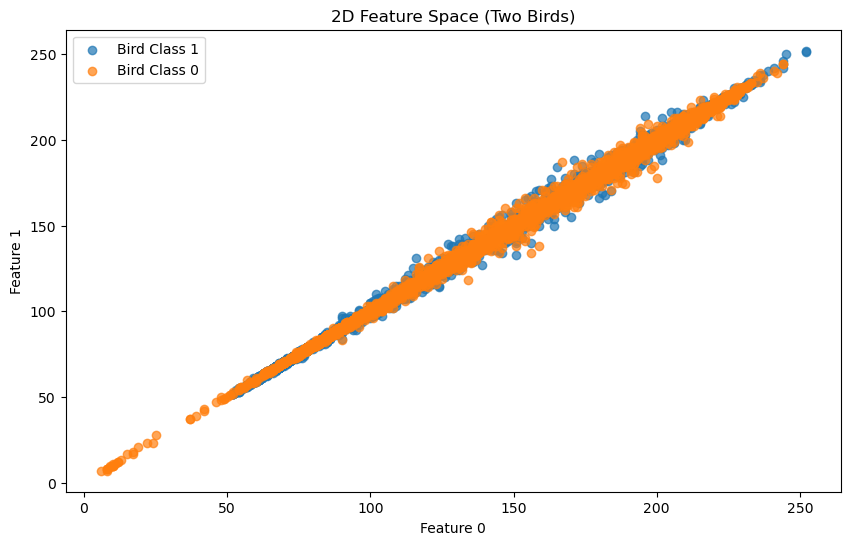

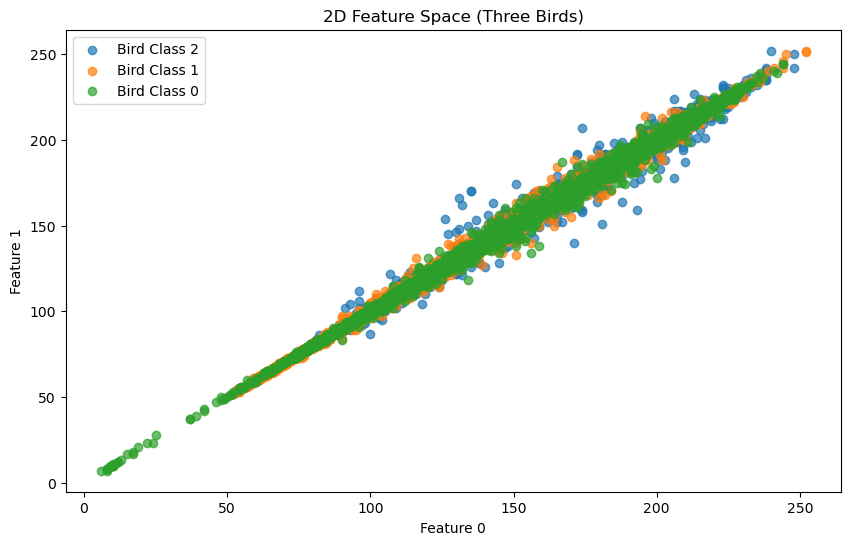

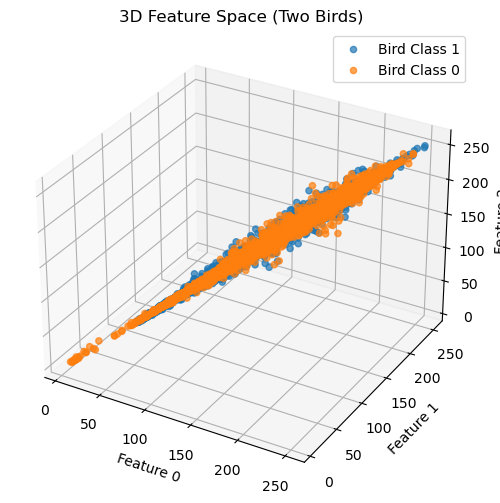

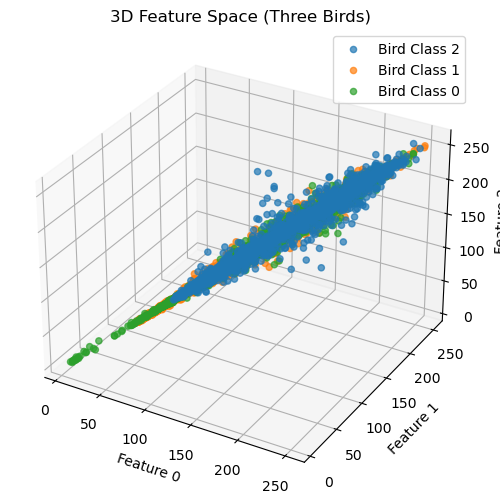

In [31]:
################################################################################################################################
##################################################### TASK 10 ##################################################################
################################################################################################################################

from mpl_toolkits.mplot3d import Axes3D

# Load the combined feature space from image01.csv and image012.csv
df_two_birds = pd.read_csv('image01.csv', header=None)  # For two bird classes (Cardinals)
df_three_birds = pd.read_csv('image012.csv', header=None)  # For three bird classes (Cardinals and Sparrows)
# Separate features and labels
# Last column in the CSV contains the labels (0, 1, or 2)
X_two_birds = df_two_birds.iloc[:, :-1]  # Features for two birds
y_two_birds = df_two_birds.iloc[:, -1]   # Labels for two birds
X_three_birds = df_three_birds.iloc[:, :-1]  # Features for three birds
y_three_birds = df_three_birds.iloc[:, -1]   # Labels for three birds
# Select two features (e.g., feature columns 0 and 1)
feature_1 = 0
feature_2 = 1
# Select three features (e.g., feature columns 0, 1, and 2)
feature_3 = 2
# Plot 2D feature space for two birds
plt.figure(figsize=(10, 6))
for label in y_two_birds.unique():
    plt.scatter(X_two_birds[y_two_birds == label].iloc[:, feature_1],
                X_two_birds[y_two_birds == label].iloc[:, feature_2],
                label=f'Bird Class {int(label)}', alpha=0.7)
plt.title('2D Feature Space (Two Birds)')
plt.xlabel(f'Feature {feature_1}')
plt.ylabel(f'Feature {feature_2}')
plt.legend()
plt.show()
# Plot 2D feature space for three birds
plt.figure(figsize=(10, 6))
for label in y_three_birds.unique():
    plt.scatter(X_three_birds[y_three_birds == label].iloc[:, feature_1],
                X_three_birds[y_three_birds == label].iloc[:, feature_2],
                label=f'Bird Class {int(label)}', alpha=0.7)
plt.title('2D Feature Space (Three Birds)')
plt.xlabel(f'Feature {feature_1}')
plt.ylabel(f'Feature {feature_2}')
plt.legend()
plt.show()
# Plot 3D feature space for two birds
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
for label in y_two_birds.unique():
    ax.scatter(X_two_birds[y_two_birds == label].iloc[:, feature_1],
               X_two_birds[y_two_birds == label].iloc[:, feature_2],
               X_two_birds[y_two_birds == label].iloc[:, feature_3],
               label=f'Bird Class {int(label)}', alpha=0.7)
ax.set_title('3D Feature Space (Two Birds)')
ax.set_xlabel(f'Feature {feature_1}')
ax.set_ylabel(f'Feature {feature_2}')
ax.set_zlabel(f'Feature {feature_3}')
ax.legend()
plt.show()
# Plot 3D feature space for three birds
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
for label in y_three_birds.unique():
    ax.scatter(X_three_birds[y_three_birds == label].iloc[:, feature_1],
               X_three_birds[y_three_birds == label].iloc[:, feature_2],
               X_three_birds[y_three_birds == label].iloc[:, feature_3],
               label=f'Bird Class {int(label)}', alpha=0.7)
ax.set_title('3D Feature Space (Three Birds)')
ax.set_xlabel(f'Feature {feature_1}')
ax.set_ylabel(f'Feature {feature_2}')
ax.set_zlabel(f'Feature {feature_3}')
ax.legend()
plt.show()

Discuss these figures and describe your observations in terms of their separable features.

The 2D feature space representations have significant overlap which indicates that the selected features do not provide for strong separation of the two classes. This observation is indicative that the birds share similar characteristics, which makes sense for this instance as we are comparing two cardinals in the 2D feature space for two birds. A linear relationship can also be observed in the data which indicates that more distinctions may be revealed by modeling the relationship using another dimension or more features. The addition of the sparrow data produces some outlier data points in this model, showing that more distinctions can be made when comparing the sparrow and the cardinal rather than simply the cardinal and another cardinal. When we consider and model the relationship between features in three dimensions, we observe a similar effect, with the 3D two bird model indicating a low rate of separability of features. The relationship remains linear with the added dimension and overlap of features is prevalent within the graphical representation. When we model all three birds in a 3D space, the outlying data points remain significant for the sparrow relative to the two cardinals, and actually appear more distinct and separable from how the 2D model depicts the relation.

In [36]:
################################################################################################################################
##################################################### TASK 11 ##################################################################
################################################################################################################################

import cv2
import pandas as pd
import numpy as np
import os

def image_to_block_vectors(image, label, block_size=16):
    vectors = []
    h, w = image.shape
    # Ensure image dimensions are divisible by block_size, apply padding if needed
    if h % block_size != 0 or w % block_size != 0:
        print(f"Warning: Image dimensions for label {label} are not divisible by block size. Padding the image.")
        pad_h = block_size - (h % block_size)
        pad_w = block_size - (w % block_size)
        image = np.pad(image, ((0, pad_h), (0, pad_w)), mode='constant', constant_values=0)
        h, w = image.shape
    # Loop over the image to divide it into blocks of block_size x block_size
    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            # Extract a block of block_size x block_size pixels
            block = image[i:i+block_size, j:j+block_size]
            # Flatten the block to a vector of size (block_size x block_size)
            vector = block.flatten()
            # Append the label to the vector (to create a labeled feature vector)
            vector = np.append(vector, label)
            # Store the vector
            vectors.append(vector)
    return vectors
def process_images_from_folder(folder_path, block_size=16):
    vectors_list = []
    labels = []
    label = 0  # Start labeling from 0
    # Get all image files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            # Read the image
            image_path = os.path.join(folder_path, filename)
            print(f"Processing image: {filename}")
            image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2GRAY)
            # Generate feature vectors for this image
            vectors = image_to_block_vectors(image, label, block_size)
            vectors_list.extend(vectors)
            labels.append(label)
            label += 1  # Increment label for the next image   
    # Convert the list of vectors to a DataFrame
    df = pd.DataFrame(vectors_list)
    # Save the DataFrame to a CSV file
    output_csv = os.path.join(folder_path, 'feature_space.csv')
    df.to_csv(output_csv, index=False, header=False)
    print(f"Feature vectors saved to '{output_csv}'.")
folder_path = r"C:\Users\willh\OneDrive\Documents\CSC410ProjectPt1\data\birdsDataset-main\Cardinals_in_color"
process_images_from_folder(folder_path)

Processing image: frame-08-02-2022111.jpg
Processing image: frame-08-02-202286.jpg
Feature vectors saved to 'C:\Users\willh\OneDrive\Documents\CSC410ProjectPt1\data\birdsDataset-main\Cardinals_in_color\feature_space.csv'.
